<a href="https://colab.research.google.com/github/hongqin/Use-R-in-CoLab/blob/master/Learn_R_county_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First, please make a copy to your own Google Drive. 
**Please make a copy of this code in your CoLab in order to modify and run the code.** <br> 
You can do this by select "File" -> "Save a copy in Drive"
## New Section
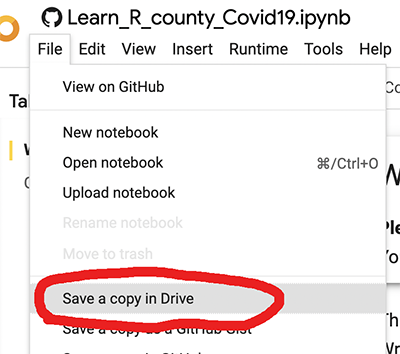



---



This is a short tutorial on using R to explore Covid19 data using Google CoLab <br>
Written by Hong Qin <br>
This version is modifed for a high-school coding bootcamp

This is a work in progress and is for educational purpose only. 

This is code can be cloned from
https://github.com/hongqin/Use-R-in-CoLab/blob/master/Learn_R_UALR_CoLab.ipynb

More tutorials at http://YouTube.com/hongqin

# Prepartion 1. Get familiar with Google CoLab

## The 'Code' and 'Text' cells
The code cell can be run by click the play icon on the upper-left corner of the code cells.

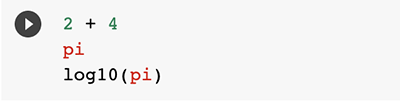

The menu on the top


## File, Edit, Insert, Runtime, Tools

## Table of contents and the left-sided panel

# Preparation 2. The COVID19 open data


A popular source for reporting COVID cases is the site built by researchers at the John Hopkins University (JHU). This JHU data set is publically available and will be used in our study. 

There are many other COVID19 data set, see
https://en.wikipedia.org/wiki/COVID-19_datasets


# Part 1. Basics of R coding

## What is R? 
It is a popular language for data analysis. See

https://en.wikipedia.org/wiki/R_(programming_language) 

There are many books on how to use R. This exercise is only meant to show some basics of R to you.

## Simple calculation

In [27]:
2 + 4
pi
log10(pi)

[1] 6

[1] 3.141593

[1] 0.4971499

In [28]:
2*4
9/3
9-7

[1] 8

[1] 3

[1] 2

## Use variables

The = sign means assignment in R and many other programming languages.

In [29]:
x = 2
y = 3
z = x  + 6
z

[1] 8

## The # sign means comments (not code)

In [30]:
# This is a comment
x = 2 #This is also a comment

## A list of numbers is called a Vector in R

In [31]:
a_vector = c(1, 3.14159, 5.0, -1, 10) # c( ) is the syntax for defining a vector 
a_vector

[1]  1.00000  3.14159  5.00000 -1.00000 10.00000

In [32]:
b_vector= a_vector + c(2, 0.5, -5, 1, -10)
b_vector

[1] 3.00000 3.64159 0.00000 0.00000 0.00000

## Vectors can be indexed. 


In [33]:
a_vector = 4:20 #The colon sign is a symbol mean from 4 to 20
a_vector

[1]  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [34]:
a_vector[1] #first element of the vector

[1] 4

In [35]:
a_vector[5]

[1] 8

### **Question**: How to find the 9-th element? 

## Functions in R uses smooth parentheses

A function that generates a list of numbers from 4 to 100 with a step of 2

In [36]:
seq(4, 100, 2) 

[1]   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40
[20]  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78
[39]  80  82  84  86  88  90  92  94  96  98 100

The function rnorm() generate random number based on Gaussian distribution


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-30.0663  -6.6330  -0.6062   6.9481  21.8430 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -0.2683     1.0601  -0.253    0.801
x             1.5508     1.0198   1.521    0.132

Residual standard error: 10.57 on 98 degrees of freedom
Multiple R-squared:  0.02305,	Adjusted R-squared:  0.01308 
F-statistic: 2.312 on 1 and 98 DF,  p-value: 0.1316


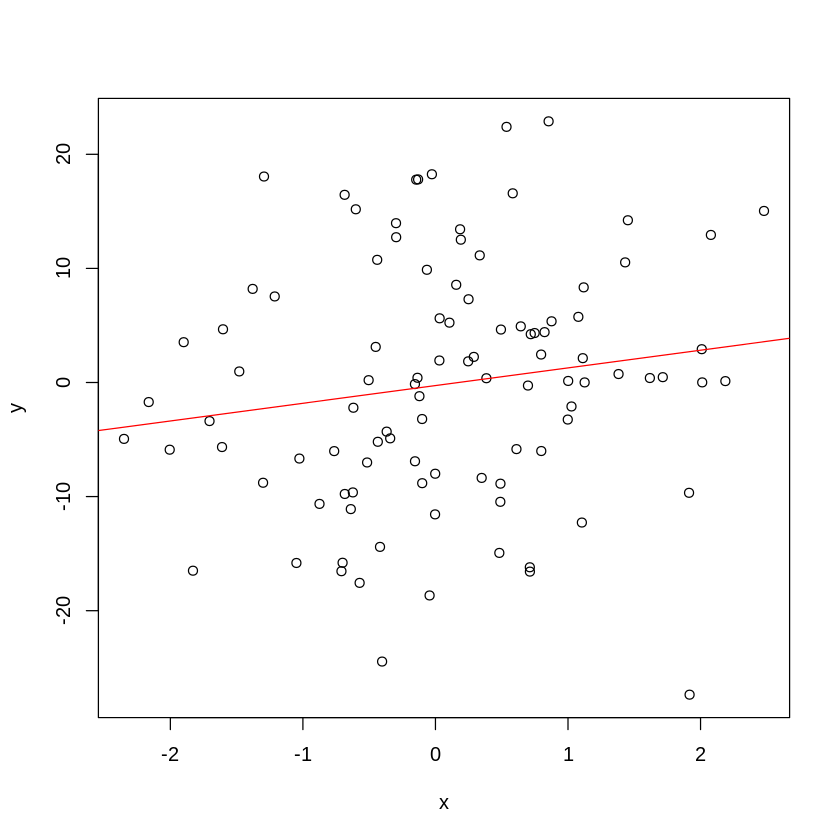

In [37]:
x = rnorm(100) #generate 100 normal-distributed (Gaussain) random nubmers 
y = x + rnorm(100)*10 # y is a linear transformation of x with some Gaussain noise
m = lm( y ~ x)
plot( y ~ x)
abline(m, col='red')
summary(m)

## Looking for helps. 
This can be done by a question mark or help(). 

In [38]:
?rnorm

In [39]:
?lm

In [40]:
?abline

In [41]:
help(seq)

## Load Libraries
Libraries are software tools developed by many people around the world.

In [68]:
library(tidyverse)
library(reshape2)
library(dplyr)

## Dataframe - the spreadsheet in R
Dataframe is a basic tool to handle data in R, in some ways like a spreadsheet in Microsoft Excel.

Now, let's load a small demo spreadsheet from a website

In [43]:
tb = read_csv("https://raw.githubusercontent.com/hongqin/Use-R-in-CoLab/master/vip-grades.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  name = col_character(),
  GPA = col_double(),
  Major = col_character(),
  College = col_character()
)




In [44]:
tb #look at the small table. Not a good idea for large table

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4.0,Biology,ArtsScience
John Adams,3.5,Computer_Science,Engineering
Thomas Jefferson,3.9,Physics,ArtsScience
James Madison,4.0,Mathematics,ArtsScience
James Monroe,3.2,Economics,Business
Andrew Jackson,3.1,Chemistry,ArtsScience
James K. Polk,3.7,Data_Science,Engineering
Zachary Taylor,2.9,Environmental_Science,ArtsScience
Millard Fillmore,4.0,Biology,ArtsScience


In [45]:
head(tb) #look at just a few row of the table

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4.0,Biology,ArtsScience
John Adams,3.5,Computer_Science,Engineering
Thomas Jefferson,3.9,Physics,ArtsScience
James Madison,4.0,Mathematics,ArtsScience
James Monroe,3.2,Economics,Business
Andrew Jackson,3.1,Chemistry,ArtsScience


### pick rows and columns using indices

In [46]:
tb[1,] #first row

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4,Biology,ArtsScience


In [47]:
tb[, 2] #second column

GPA
<dbl>
4.0
3.5
3.9
4.0
3.2
3.1
3.7
2.9
4.0


In [48]:
tb[c(1,5,9), 1:2] # the 1st, 5th, and 9th rows, two columns

name,GPA
<chr>,<dbl>
George Washington,4.0
James Monroe,3.2
Millard Fillmore,4.0


In [49]:
tb

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4.0,Biology,ArtsScience
John Adams,3.5,Computer_Science,Engineering
Thomas Jefferson,3.9,Physics,ArtsScience
James Madison,4.0,Mathematics,ArtsScience
James Monroe,3.2,Economics,Business
Andrew Jackson,3.1,Chemistry,ArtsScience
James K. Polk,3.7,Data_Science,Engineering
Zachary Taylor,2.9,Environmental_Science,ArtsScience
Millard Fillmore,4.0,Biology,ArtsScience


### Pick a colum with $ or index

In [50]:
tb$Grade

Warning message:
“Unknown or uninitialised column: `Grade`.”


NULL

In [51]:
tb[, 2]

GPA
<dbl>
4.0
3.5
3.9
4.0
3.2
3.1
3.7
2.9
4.0


### Pick a row 

In [52]:
tb[1,]

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4,Biology,ArtsScience


### use fancy tidyverse

In [55]:
tb %>% dplyr::select( name, GPA )  %>% filter (GPA >= 3.0)

name,GPA
<chr>,<dbl>
George Washington,4.0
John Adams,3.5
Thomas Jefferson,3.9
James Madison,4.0
James Monroe,3.2
Andrew Jackson,3.1
James K. Polk,3.7
Millard Fillmore,4.0
Franklin Pierce,3.8


In [63]:
tb %>% select( College) %>% distinct

College
<chr>
ArtsScience
Engineering
Business


In [62]:
tb %>% filter (College == "ArtsScience")


name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4.0,Biology,ArtsScience
Thomas Jefferson,3.9,Physics,ArtsScience
James Madison,4.0,Mathematics,ArtsScience
Andrew Jackson,3.1,Chemistry,ArtsScience
Zachary Taylor,2.9,Environmental_Science,ArtsScience
Millard Fillmore,4.0,Biology,ArtsScience
Ulysses S. Grant,2.9,Political_Science,ArtsScience
Rutherford B. Hayes,3.0,Psychology,ArtsScience
James Garfield,3.2,Philosophy,ArtsScience


In [64]:
tb %>% filter (College == "Engineering")

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
John Adams,3.5,Computer_Science,Engineering
James K. Polk,3.7,Data_Science,Engineering
Franklin Pierce,3.8,Computer_Engineering,Engineering
James Buchanan,3.7,Electronic_Engineering,Engineering
Abraham Lincoln,3.6,Chemical_Engineering,Engineering
Chester A. Arthur,3.5,Computer_Science,Engineering
William McKinley,2.9,Computer_Science,Engineering
Herbert Hoover,3.6,Data_Science,Engineering
Franklin D. Roosevelt,3.9,Computer_Science,Engineering


### Question: Are GPA different between VIP students in Egnineering versus Art and Science? 

We can do a t-test. 

In [67]:
tbEng = tb %>% filter (College == "Engineering") 
tbAS = tb %>% filter (College == "ArtsScience")
t.test( tbEng$GPA, tbAS$GPA) # a t-test


	Welch Two Sample t-test

data:  tbEng$GPA and tbAS$GPA
t = 0.59723, df = 23.457, p-value = 0.5561
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2202747  0.3993597
sample estimates:
mean of x mean of y 
 3.577778  3.488235 


Generally, a p-value larger than 0.05 means no significant difference in the statistical sense. 

For more information on p-value, see 
https://en.wikipedia.org/wiki/P-value

# Part 2, Explore the USA county-level COVID19 case data


We will go through the COVID19 case data set and learn more R on the way. 



First, install and load some necessary packages

In [1]:
install.packages('reshape2')
library(tidyverse)
library(lubridate)
library(reshape2)
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




## Load the COVID19 data into a dataframe

In [5]:
# load JHU covid19 data set with tidyverse read_csv
# this is the URL for "view raw " for csv files on GitHub
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [6]:
head(tb)

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,⋯,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,⋯,2979,3005,3043,3087,3117,3186,3233,3258,3300,3329
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,⋯,9626,9728,9821,9974,10087,10288,10489,10665,10806,10898
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,⋯,1219,1223,1224,1240,1245,1258,1264,1269,1272,1275
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,⋯,1283,1293,1299,1317,1322,1359,1398,1417,1441,1455
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,⋯,3281,3299,3324,3426,3496,3600,3663,3744,3776,3803
84001011,US,USA,840,1011,Bullock,Alabama,US,32.10031,-85.71266,⋯,713,713,714,719,722,722,723,725,728,728


## Pick rows, columns, and cells in DataFrames

A a_ij


In [7]:
# pick first row, second colum
tb[1,2] 

# pick 4th row, 5th colum. Notice that R starts with 1, not zero like Python
tb[4, 5]

iso2
<chr>
US


FIPS
<dbl>
1007


In [8]:
# pick first column and  first 10 rows
tb[ 1:10, 1]

UID
<dbl>
84001001
84001003
84001005
84001007
84001009
84001011
84001013
84001015
84001017


In [9]:
# pick 6-7th rows, 4-8 colums
tb[ 6:7, 4:8]

code3,FIPS,Admin2,Province_State,Country_Region
<dbl>,<dbl>,<chr>,<chr>,<chr>
840,1011,Bullock,Alabama,US
840,1013,Butler,Alabama,US


In [10]:
# The daily cases data started on the 12th column
tb[ 1:5, 1:12]

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,"Autauga, Alabama, US",0
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,"Baldwin, Alabama, US",0
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,"Barbour, Alabama, US",0
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,"Bibb, Alabama, US",0
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,"Blount, Alabama, US",0


In [13]:
?length

In [14]:
# how many columns? 
length(tb[1,])
print(paste( "There are ", length(tb[1,]), " columns"))

[1] 339

[1] "There are  339  columns"


In [15]:
# view the first 5 rows in all data columns
tb[1:5 , 12: length(tb[1,])  ]

1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,⋯,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,2979,3005,3043,3087,3117,3186,3233,3258,3300,3329
0,0,0,0,0,0,0,0,0,0,⋯,9626,9728,9821,9974,10087,10288,10489,10665,10806,10898
0,0,0,0,0,0,0,0,0,0,⋯,1219,1223,1224,1240,1245,1258,1264,1269,1272,1275
0,0,0,0,0,0,0,0,0,0,⋯,1283,1293,1299,1317,1322,1359,1398,1417,1441,1455
0,0,0,0,0,0,0,0,0,0,⋯,3281,3299,3324,3426,3496,3600,3663,3744,3776,3803


## Select columns of daily cases

select the all columns of actual data, from the 12 th column to the last column.

In [16]:
tb %>% dplyr::select( 12:length(tb[1,]) ) #It seems that CoLab often rquire explicit pakcage for function calls. 

1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,⋯,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,2979,3005,3043,3087,3117,3186,3233,3258,3300,3329
0,0,0,0,0,0,0,0,0,0,⋯,9626,9728,9821,9974,10087,10288,10489,10665,10806,10898
0,0,0,0,0,0,0,0,0,0,⋯,1219,1223,1224,1240,1245,1258,1264,1269,1272,1275
0,0,0,0,0,0,0,0,0,0,⋯,1283,1293,1299,1317,1322,1359,1398,1417,1441,1455
0,0,0,0,0,0,0,0,0,0,⋯,3281,3299,3324,3426,3496,3600,3663,3744,3776,3803
0,0,0,0,0,0,0,0,0,0,⋯,713,713,714,719,722,722,723,725,728,728
0,0,0,0,0,0,0,0,0,0,⋯,1225,1236,1244,1257,1263,1287,1289,1306,1330,1340
0,0,0,0,0,0,0,0,0,0,⋯,7027,7096,7165,7300,7392,7534,7658,7760,7813,7872
0,0,0,0,0,0,0,0,0,0,⋯,1901,1906,1915,1945,1961,1977,1982,1997,2013,2022


## Rotate the data so that data of each county is in one column

In [21]:
# We need save the data into a new variable 'tb1' so that computer can remember it
tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1)) # t for transpose, then convert to a dataframe
tail(tb1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V3331,V3332,V3333,V3334,V3335,V3336,V3337,V3338,V3339,V3340
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12/9/20,3117,10087,1245,1322,3496,722,1263,7392,1961,1134,⋯,1552,375,2237,526,2245,1834,1250,0,586,427
12/10/20,3186,10288,1258,1359,3600,722,1287,7534,1977,1149,⋯,1574,373,2267,534,2281,1852,1271,0,596,428
12/11/20,3233,10489,1264,1398,3663,723,1289,7658,1982,1167,⋯,1595,378,2290,536,2376,1868,1281,0,620,428
12/12/20,3258,10665,1269,1417,3744,725,1306,7760,1997,1187,⋯,1600,381,2293,539,2384,1886,1289,0,629,428
12/13/20,3300,10806,1272,1441,3776,728,1330,7813,2013,1197,⋯,1636,390,2323,540,2451,1905,1307,0,639,428
12/14/20,3329,10898,1275,1455,3803,728,1340,7872,2022,1204,⋯,1654,392,2345,544,2518,1930,1327,0,644,429


## Add meaning columns names

The Combined_Key are useful column names

In [22]:
names(tb1) = tb$Combined_Key
#tail(tb1[100:110,1:10])
tail(tb1[,1:10])


,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US"
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12/9/20,3117,10087,1245,1322,3496,722,1263,7392,1961,1134
12/10/20,3186,10288,1258,1359,3600,722,1287,7534,1977,1149
12/11/20,3233,10489,1264,1398,3663,723,1289,7658,1982,1167
12/12/20,3258,10665,1269,1417,3744,725,1306,7760,1997,1187
12/13/20,3300,10806,1272,1441,3776,728,1330,7813,2013,1197
12/14/20,3329,10898,1275,1455,3803,728,1340,7872,2022,1204


## Convert dates from text format to actual Date type

see https://lubridate.tidyverse.org/ 

In [23]:
library(lubridate)
date("10/1/2020")

[1] "10-01-20"

In [24]:
current_dates = names(tb)[12:length(tb[1,])]
class(current_dates)
current_dates

[1] "character"

[1] "1/22/20"  "1/23/20"  "1/24/20"  "1/25/20"  "1/26/20"  "1/27/20" 
  [7] "1/28/20"  "1/29/20"  "1/30/20"  "1/31/20"  "2/1/20"   "2/2/20"  
 [13] "2/3/20"   "2/4/20"   "2/5/20"   "2/6/20"   "2/7/20"   "2/8/20"  
 [19] "2/9/20"   "2/10/20"  "2/11/20"  "2/12/20"  "2/13/20"  "2/14/20" 
 [25] "2/15/20"  "2/16/20"  "2/17/20"  "2/18/20"  "2/19/20"  "2/20/20" 
 [31] "2/21/20"  "2/22/20"  "2/23/20"  "2/24/20"  "2/25/20"  "2/26/20" 
 [37] "2/27/20"  "2/28/20"  "2/29/20"  "3/1/20"   "3/2/20"   "3/3/20"  
 [43] "3/4/20"   "3/5/20"   "3/6/20"   "3/7/20"   "3/8/20"   "3/9/20"  
 [49] "3/10/20"  "3/11/20"  "3/12/20"  "3/13/20"  "3/14/20"  "3/15/20" 
 [55] "3/16/20"  "3/17/20"  "3/18/20"  "3/19/20"  "3/20/20"  "3/21/20" 
 [61] "3/22/20"  "3/23/20"  "3/24/20"  "3/25/20"  "3/26/20"  "3/27/20" 
 [67] "3/28/20"  "3/29/20"  "3/30/20"  "3/31/20"  "4/1/20"   "4/2/20"  
 [73] "4/3/20"   "4/4/20"   "4/5/20"   "4/6/20"   "4/7/20"   "4/8/20"  
 [79] "4/9/20"   "4/10/20"  "4/11/20"  "4/12/20"  "4/13/20"  "4/14/20" 
 [85] "4/15/20"  "4/16/20"  "4/17/20"  "4/18/20"  "4/19/20"  "4/20/20" 
 [91] "4/21/20"  "4/22/20"  "4/23/20"  "4/24/20"  "4/25/20"  "4/26/20" 
 [97] "4/27/20"  "4/28/20"  "4/29/20"  "4/30/20"  "5/1/20"   "5/2/20"  
[103] "5/3/20"   "5/4/20"   "5/5/20"   "5/6/20"   "5/7/20"   "5/8/20"  
[109] "5/9/20"   "5/10/20"  "5/11/20"  "5/12/20"  "5/13/20"  "5/14/20" 
[115] "5/15/20"  "5/16/20"  "5/17/20"  "5/18/20"  "5/19/20"  "5/20/20" 
[121] "5/21/20"  "5/22/20"  "5/23/20"  "5/24/20"  "5/25/20"  "5/26/20" 
[127] "5/27/20"  "5/28/20"  "5/29/20"  "5/30/20"  "5/31/20"  "6/1/20"  
[133] "6/2/20"   "6/3/20"   "6/4/20"   "6/5/20"   "6/6/20"   "6/7/20"  
[139] "6/8/20"   "6/9/20"   "6/10/20"  "6/11/20"  "6/12/20"  "6/13/20" 
[145] "6/14/20"  "6/15/20"  "6/16/20"  "6/17/20"  "6/18/20"  "6/19/20" 
[151] "6/20/20"  "6/21/20"  "6/22/20"  "6/23/20"  "6/24/20"  "6/25/20" 
[157] "6/26/20"  "6/27/20"  "6/28/20"  "6/29/20"  "6/30/20"  "7/1/20"  
[163] "7/2/20"   "7/3/20"   "7/4/20"   "7/5/20"   "7/6/20"   "7/7/20"  
[169] "7/8/20"   "7/9/20"   "7/10/20"  "7/11/20"  "7/12/20"  "7/13/20" 
[175] "7/14/20"  "7/15/20"  "7/16/20"  "7/17/20"  "7/18/20"  "7/19/20" 
[181] "7/20/20"  "7/21/20"  "7/22/20"  "7/23/20"  "7/24/20"  "7/25/20" 
[187] "7/26/20"  "7/27/20"  "7/28/20"  "7/29/20"  "7/30/20"  "7/31/20" 
[193] "8/1/20"   "8/2/20"   "8/3/20"   "8/4/20"   "8/5/20"   "8/6/20"  
[199] "8/7/20"   "8/8/20"   "8/9/20"   "8/10/20"  "8/11/20"  "8/12/20" 
[205] "8/13/20"  "8/14/20"  "8/15/20"  "8/16/20"  "8/17/20"  "8/18/20" 
[211] "8/19/20"  "8/20/20"  "8/21/20"  "8/22/20"  "8/23/20"  "8/24/20" 
[217] "8/25/20"  "8/26/20"  "8/27/20"  "8/28/20"  "8/29/20"  "8/30/20" 
[223] "8/31/20"  "9/1/20"   "9/2/20"   "9/3/20"   "9/4/20"   "9/5/20"  
[229] "9/6/20"   "9/7/20"   "9/8/20"   "9/9/20"   "9/10/20"  "9/11/20" 
[235] "9/12/20"  "9/13/20"  "9/14/20"  "9/15/20"  "9/16/20"  "9/17/20" 
[241] "9/18/20"  "9/19/20"  "9/20/20"  "9/21/20"  "9/22/20"  "9/23/20" 
[247] "9/24/20"  "9/25/20"  "9/26/20"  "9/27/20"  "9/28/20"  "9/29/20" 
[253] "9/30/20"  "10/1/20"  "10/2/20"  "10/3/20"  "10/4/20"  "10/5/20" 
[259] "10/6/20"  "10/7/20"  "10/8/20"  "10/9/20"  "10/10/20" "10/11/20"
[265] "10/12/20" "10/13/20" "10/14/20" "10/15/20" "10/16/20" "10/17/20"
[271] "10/18/20" "10/19/20" "10/20/20" "10/21/20" "10/22/20" "10/23/20"
[277] "10/24/20" "10/25/20" "10/26/20" "10/27/20" "10/28/20" "10/29/20"
[283] "10/30/20" "10/31/20" "11/1/20"  "11/2/20"  "11/3/20"  "11/4/20" 
[289] "11/5/20"  "11/6/20"  "11/7/20"  "11/8/20"  "11/9/20"  "11/10/20"
[295] "11/11/20" "11/12/20" "11/13/20" "11/14/20" "11/15/20" "11/16/20"
[301] "11/17/20" "11/18/20" "11/19/20" "11/20/20" "11/21/20" "11/22/20"
[307] "11/23/20" "11/24/20" "11/25/20" "11/26/20" "11/27/20" "11/28/20"
[313] "11/29/20" "11/30/20" "12/1/20"  "12/2/20"  "12/3/20"  "12/4/20" 
[319] "12/5/20"  "12/6/20"  "12/7/20"  "12/8/20"  "12/9/20"  "12/10/20"
[325] "12/11/20" "12/12/20" "12/13/20" "12/14/20"

In [25]:
mdy(current_dates[1:10])

[1] "2020-01-22" "2020-01-23" "2020-01-24" "2020-01-25" "2020-01-26"
 [6] "2020-01-27" "2020-01-28" "2020-01-29" "2020-01-30" "2020-01-31"

In [26]:
tb1$dates = mdy(current_dates)
tail(tb1)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
12/9/20,3117,10087,1245,1322,3496,722,1263,7392,1961,1134,⋯,375,2237,526,2245,1834,1250,0,586,427,2020-12-09
12/10/20,3186,10288,1258,1359,3600,722,1287,7534,1977,1149,⋯,373,2267,534,2281,1852,1271,0,596,428,2020-12-10
12/11/20,3233,10489,1264,1398,3663,723,1289,7658,1982,1167,⋯,378,2290,536,2376,1868,1281,0,620,428,2020-12-11
12/12/20,3258,10665,1269,1417,3744,725,1306,7760,1997,1187,⋯,381,2293,539,2384,1886,1289,0,629,428,2020-12-12
12/13/20,3300,10806,1272,1441,3776,728,1330,7813,2013,1197,⋯,390,2323,540,2451,1905,1307,0,639,428,2020-12-13
12/14/20,3329,10898,1275,1455,3803,728,1340,7872,2022,1204,⋯,392,2345,544,2518,1930,1327,0,644,429,2020-12-14


## Select a time window (row window) using 'filter'

In [27]:
tb1 %>% filter( dates > mdy("4/30/2020"), dates < mdy("5/31/20")) %>% head()

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
5/1/20,43,180,42,41,41,14,68,97,295,16,⋯,0,16,3,18,96,8,0,8,0,2020-05-01
5/2/20,47,185,43,41,42,14,93,102,296,16,⋯,0,16,3,18,97,8,0,8,0,2020-05-02
5/3/20,51,190,45,42,42,14,104,109,302,19,⋯,0,16,3,18,98,8,0,8,0,2020-05-03
5/4/20,54,190,45,43,42,15,113,109,307,19,⋯,0,16,3,18,98,8,0,8,0,2020-05-04
5/5/20,54,194,47,43,42,17,118,118,309,19,⋯,0,16,3,18,98,8,0,8,0,2020-05-05
5/6/20,56,199,47,43,44,17,128,120,313,20,⋯,0,16,3,19,98,8,0,8,0,2020-05-06


In [28]:
start = mdy("9/14/20")
start + ddays(13)

[1] "2020-09-27"

In [29]:
tb1 %>% dplyr::filter( dates >= start, dates <=  start + ddays(13)) %>% dplyr::select(1:5)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US"
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9/14/20,1586,4949,801,600,1490
9/15/20,1601,4964,807,601,1504
9/16/20,1614,4982,807,606,1515
9/17/20,1650,4994,822,607,1538
9/18/20,1659,5016,825,619,1551
9/19/20,1675,5029,831,623,1564
9/20/20,1676,5053,833,624,1573
9/21/20,1697,5090,846,628,1586
9/22/20,1697,5106,848,633,1593


## Plot a time window

In [30]:
start = mdy("9/16/20")
start + ddays(14)

tb_sub <- 
 tb1 %>% dplyr::filter( dates >= start, dates <  start + ddays(14)) %>% dplyr::select( c(1:5), dates)

tb_sub

[1] "2020-09-30"

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
9/16/20,1614,4982,807,606,1515,2020-09-16
9/17/20,1650,4994,822,607,1538,2020-09-17
9/18/20,1659,5016,825,619,1551,2020-09-18
9/19/20,1675,5029,831,623,1564,2020-09-19
9/20/20,1676,5053,833,624,1573,2020-09-20
9/21/20,1697,5090,846,628,1586,2020-09-21
9/22/20,1697,5106,848,633,1593,2020-09-22
9/23/20,1711,5127,852,637,1605,2020-09-23
9/24/20,1736,5397,868,646,1614,2020-09-24


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



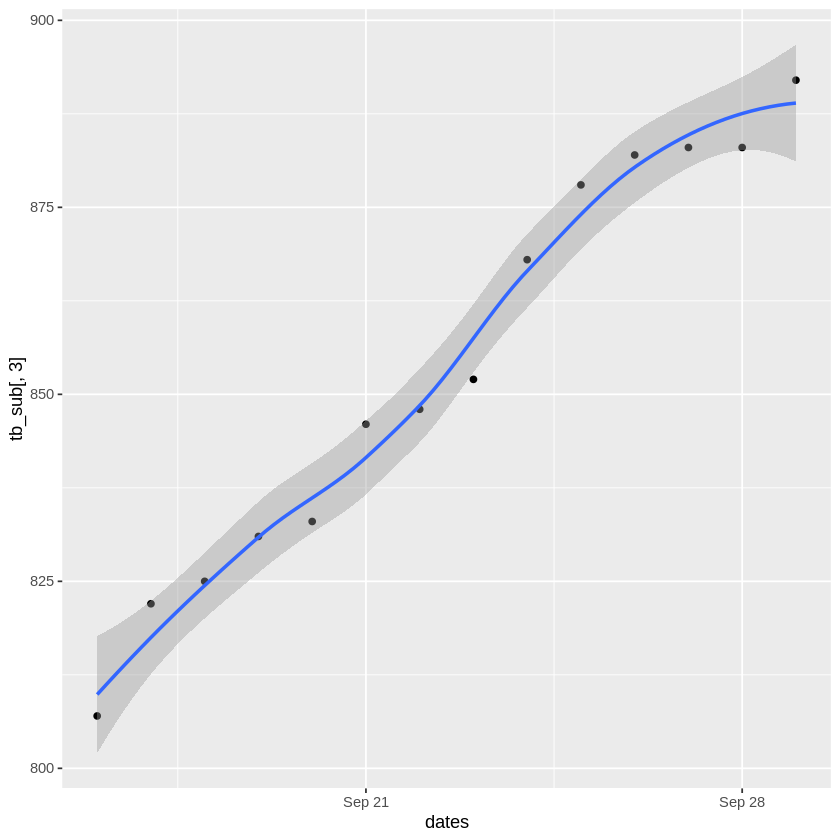

In [31]:
ggplot(tb_sub, aes( x = dates, y=tb_sub[,3])) + geom_point() + geom_smooth()

# Part 3, Let's look a specific county. 
How about Hamilton, TN? This is the county where Chattanooga, TN is located.


In [32]:
mycountyname = 'Hamilton'
myState = 'Tennessee'
countyStateUSA = 'Hamilton, Tennessee, US'

In [33]:
print(paste("There are ", length(names(tb1)[ grep( mycountyname, colnames(tb1))] ), mycountyname, "counties in the USA"))

[1] "There are  10 Hamilton counties in the USA"


In [34]:
head(tb1)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1/22/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-22
1/23/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-23
1/24/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-24
1/25/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-25
1/26/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-26
1/27/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-27


In [35]:
tb_mycounty <-  tb1 %>% 
   dplyr::select ( countyStateUSA, dates)

head(tb_mycounty)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(countyStateUSA)` instead of `countyStateUSA` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



,"Hamilton, Tennessee, US",dates
,<dbl>,<date>
1/22/20,0,2020-01-22
1/23/20,0,2020-01-23
1/24/20,0,2020-01-24
1/25/20,0,2020-01-25
1/26/20,0,2020-01-26
1/27/20,0,2020-01-27


In [36]:
tb_mycounty <- tb_mycounty %>%
   dplyr::filter( between(dates, mdy('4/1/20'), mdy('10/20/20')))
head(tb_mycounty)

,"Hamilton, Tennessee, US",dates
,<dbl>,<date>
4/1/20,50,2020-04-01
4/2/20,61,2020-04-02
4/3/20,67,2020-04-03
4/4/20,71,2020-04-04
4/5/20,74,2020-04-05
4/6/20,83,2020-04-06


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



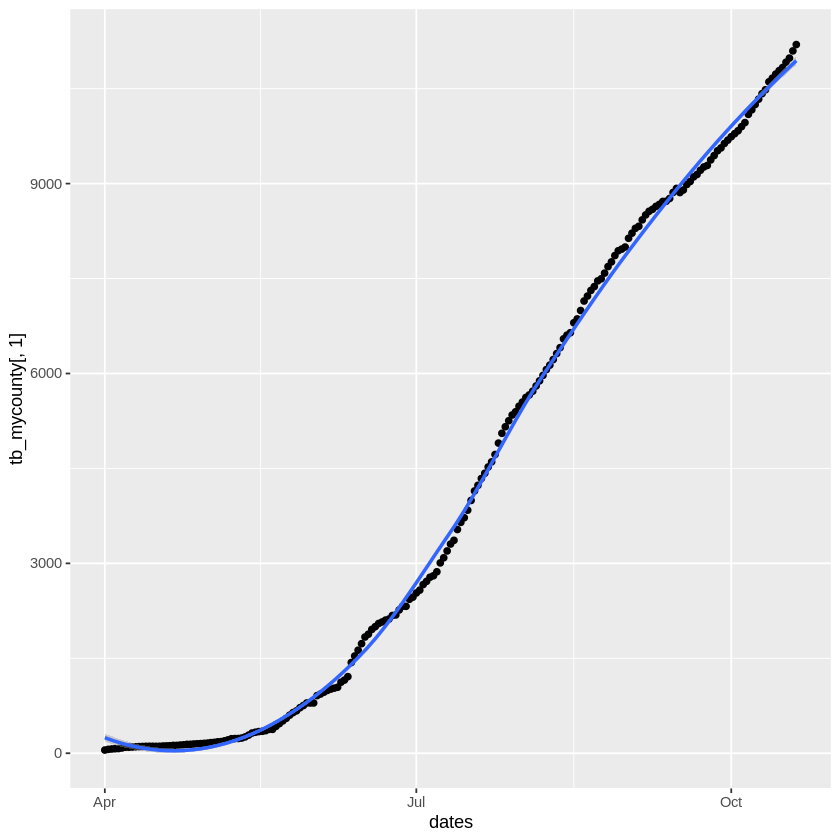

In [37]:
ggplot(tb_mycounty, aes( x = dates, y=tb_mycounty[,1])) + geom_point() + geom_smooth()

# Part 3. Daily cases

   ## Read the cumulative cases again

In [ ]:
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))

tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1))

names(tb1) = tb$Combined_Key

current_dates = names(tb)[12:length(tb[1,])]
tb1$dates = mdy(current_dates)
#head(tb1)

mycounties = c( 'Hamilton, Tennessee, US', 'Davidson, Tennessee, US')

days_window = 180  # time  window
endday = today(tzone ='EST')

tb_sub <- tb1 %>% 
  dplyr::select( all_of(mycounties), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   


str(tb_sub)
head(tb_sub)



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)
ℹ Use `spec()` for the full column specifications.




'data.frame':	180 obs. of  3 variables:
 $ Hamilton, Tennessee, US: num  133 140 141 146 149 152 156 160 168 172 ...
 $ Davidson, Tennessee, US: num  2011 2136 2236 2338 2383 ...
 $ dates                  : Date, format: "2020-04-24" "2020-04-25" ...


,"Hamilton, Tennessee, US","Davidson, Tennessee, US",dates
,<dbl>,<dbl>,<date>
4/24/20,133,2011,2020-04-24
4/25/20,140,2136,2020-04-25
4/26/20,141,2236,2020-04-26
4/27/20,146,2338,2020-04-27
4/28/20,149,2383,2020-04-28
4/29/20,152,2454,2020-04-29


## Covert cumulative counts into daily cases

In [ ]:
tb_daily_sub = data.frame( apply(tb_sub[,1:2], 2, diff) )

tb_daily_sub$YMD = mdy(row.names(tb_daily_sub))
head(tb_daily_sub)

,Hamilton..Tennessee..US,Davidson..Tennessee..US,YMD
,<dbl>,<dbl>,<date>
4/25/20,7,125,2020-04-25
4/26/20,1,100,2020-04-26
4/27/20,5,102,2020-04-27
4/28/20,3,45,2020-04-28
4/29/20,3,71,2020-04-29
4/30/20,4,158,2020-04-30


In [ ]:
tail(tb_daily_sub)

,Hamilton..Tennessee..US,Davidson..Tennessee..US,YMD
,<dbl>,<dbl>,<date>
10/15/20,55,178,2020-10-15
10/16/20,49,38,2020-10-16
10/17/20,84,252,2020-10-17
10/18/20,65,240,2020-10-18
10/19/20,114,376,2020-10-19
10/20/20,100,113,2020-10-20


In [ ]:
# add comma back to row names
gsub( '\\.\\.', ', ', names(tb_daily_sub))
names(tb_daily_sub) = gsub( '\\.\\.', ', ', names(tb_daily_sub))

[1] "Hamilton, Tennessee, US" "Davidson, Tennessee, US"
[3] "YMD"

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



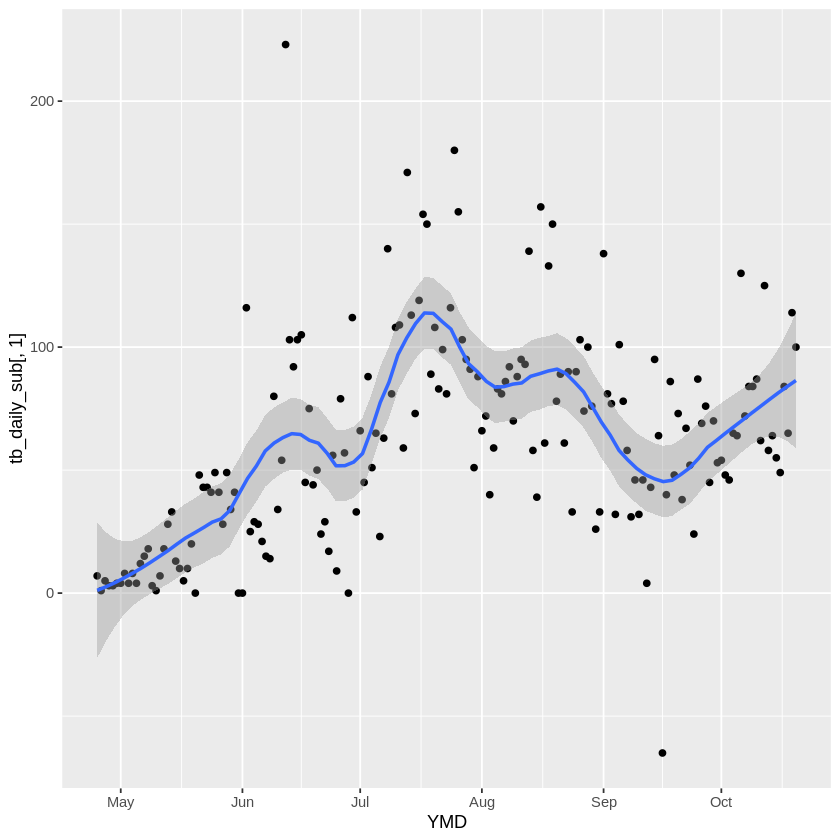

In [ ]:
myplot <- ggplot(tb_daily_sub, aes(x=YMD, y=tb_daily_sub[,1]))
myplot + geom_point() + stat_smooth(span=0.3)

## multi-county plots

,YMD,Counties,DailyCases
,<date>,<fct>,<dbl>
1,2020-04-25,"Hamilton, Tennessee, US",7
2,2020-04-26,"Hamilton, Tennessee, US",1
3,2020-04-27,"Hamilton, Tennessee, US",5
4,2020-04-28,"Hamilton, Tennessee, US",3
5,2020-04-29,"Hamilton, Tennessee, US",3
6,2020-04-30,"Hamilton, Tennessee, US",4


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



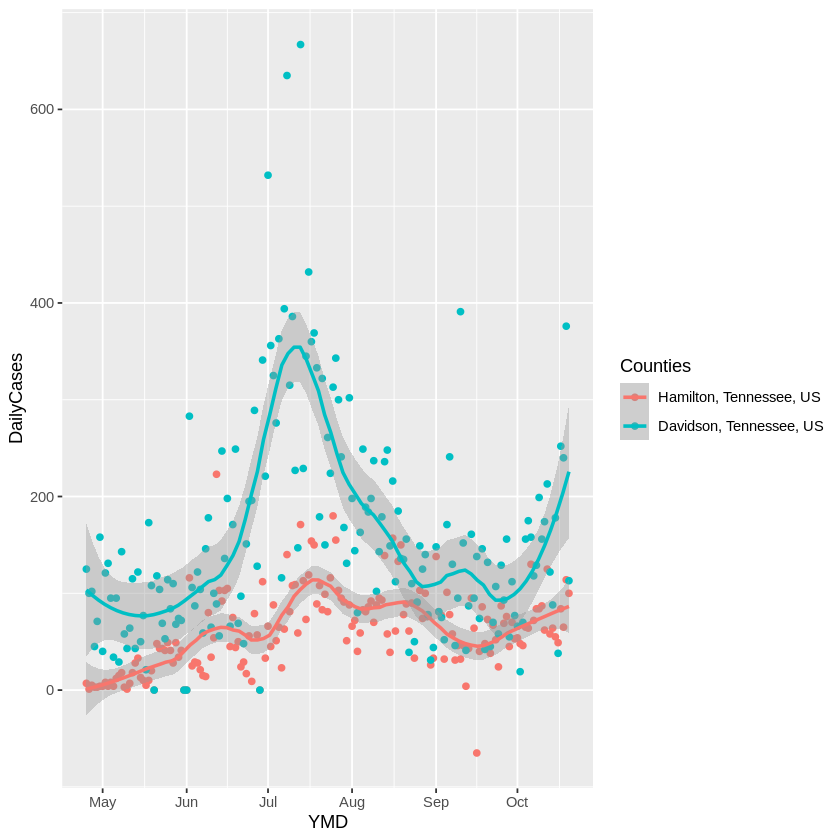

In [ ]:
library(reshape2)
mycounties = c( 'Hamilton, Tennessee, US', 'Davidson, Tennessee, US')

df_tmp <- melt(tb_daily_sub, measure.vars = mycounties, value.name = 'DailyCases', variable.name = 'Counties')
head(df_tmp)

plot <- ggplot( df_tmp, aes(x=YMD, y=DailyCases, color=Counties) ) + geom_point()
plot + stat_smooth(span=0.3)

# Part 3. Google Mobility analysis


## Regional mobility

In [ ]:
system("wget https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip")

We should now see "Region_Mobility_Report_CSV.zip" in /content folder. Double-click, should unzip this file

In [ ]:
system("unzip /content/Region_Mobility_Report_CSVs.zip")

We should now see "/content/2020_US_Region_Mobility_Report.csv"

In [ ]:
library(tidyverse)
tbGMUS = read_csv("/content/2020_US_Region_Mobility_Report.csv")
tail(tbGMUS)


── Column specification ────────────────────────────────────────────────────────
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_character(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_character(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)




country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
US,United States,Wyoming,Weston County,NA,NA,56045,2020-10-09,NA,NA,NA,NA,-13,NA
US,United States,Wyoming,Weston County,NA,NA,56045,2020-10-12,NA,NA,NA,NA,-18,NA
US,United States,Wyoming,Weston County,NA,NA,56045,2020-10-13,NA,NA,NA,NA,-13,NA
US,United States,Wyoming,Weston County,NA,NA,56045,2020-10-14,NA,NA,NA,NA,-16,NA
US,United States,Wyoming,Weston County,NA,NA,56045,2020-10-15,NA,NA,NA,NA,-10,NA
US,United States,Wyoming,Weston County,NA,NA,56045,2020-10-16,NA,NA,NA,NA,-9,NA


It seems Google Mobility is weekly updated.

## Pick Mobility data from my county

In [ ]:
myState = 'Tennessee'
myCounty = "Hamilton County"

In [ ]:
tbGMmycounty <-
  tbGMUS %>% filter( sub_region_1 == myState, sub_region_2 == myCounty)
head(tbGMmycounty)

country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-02-15,12,6,54,7,1,-1
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-02-16,6,-1,24,-2,0,-1
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-02-17,10,0,54,0,-15,4
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-02-18,-1,-4,-1,5,0,1
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-02-19,4,6,14,6,2,0
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-02-20,-7,-5,-28,-4,-1,3


In [ ]:
tail(tbGMmycounty)

country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-10-11,-15,-10,-12,-58,-19,4
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-10-12,-11,-6,58,-48,-37,9
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-10-13,-9,-5,102,-42,-34,7
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-10-14,-7,-2,76,-43,-34,7
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-10-15,-10,-4,56,-45,-33,7
US,United States,Tennessee,Hamilton County,NA,NA,47065,2020-10-16,-11,-6,53,-43,-35,8


In [ ]:
length(names(tbGMmycounty))

[1] 14

In [ ]:
max(tbGMmycounty$date)

[1] "2020-10-16"

## Merge mobility, covid19 for my county





First, pick the daily case of my county

In [ ]:
head( tb_daily_sub)

,"Hamilton, Tennessee, US","Davidson, Tennessee, US",YMD
,<dbl>,<dbl>,<date>
4/25/20,7,125,2020-04-25
4/26/20,1,100,2020-04-26
4/27/20,5,102,2020-04-27
4/28/20,3,45,2020-04-28
4/29/20,3,71,2020-04-29
4/30/20,4,158,2020-04-30


In [ ]:
tb_daily_mycounty = tb_daily_sub[, c(1,3)]
head(tb_daily_mycounty)
names(tb_daily_mycounty) = c("DailyCases", "date")

,"Hamilton, Tennessee, US",YMD
,<dbl>,<date>
4/25/20,7,2020-04-25
4/26/20,1,2020-04-26
4/27/20,5,2020-04-27
4/28/20,3,2020-04-28
4/29/20,3,2020-04-29
4/30/20,4,2020-04-30


Now, find the shared time window
between tb_daily_sub and tbGMmycounty


In [ ]:
min(tb_daily_mycounty$date)

[1] "2020-04-25"

In [ ]:
max(tb_daily_mycounty$date)

[1] "2020-10-20"

In [ ]:
last_shared_date = min( c( max(tb_daily_mycounty$date),  max(tbGMmycounty$date) ) )
last_shared_date 

[1] "2020-10-16"

In [ ]:
first_shared_date = max( c(min(tb_daily_mycounty$date),min(tbGMmycounty$date)))
first_shared_date

[1] "2020-04-25"

Trim the Google mobility data based on the time window

In [ ]:
tbGMmycounty2 <-
  tbGMmycounty %>%
  dplyr::select(8:length(names(tbGMmycounty))) %>%
  dplyr::filter( between(date, first_shared_date, last_shared_date ))

str(tbGMmycounty2)

tibble [175 × 7] (S3: tbl_df/tbl/data.frame)
 $ date                                              : Date[1:175], format: "2020-04-25" "2020-04-26" ...
 $ retail_and_recreation_percent_change_from_baseline: num [1:175] -40 -42 -22 -22 -28 -23 -21 -27 -29 -15 ...
 $ grocery_and_pharmacy_percent_change_from_baseline : num [1:175] -7 -15 -6 -3 -8 2 4 9 -3 1 ...
 $ parks_percent_change_from_baseline                : num [1:175] -34 -52 -4 28 -28 -15 29 48 17 9 ...
 $ transit_stations_percent_change_from_baseline     : num [1:175] -39 -52 -41 -32 -45 -39 -35 -16 -39 -37 ...
 $ workplaces_percent_change_from_baseline           : num [1:175] -29 -35 -41 -41 -43 -41 -40 -23 -27 -38 ...
 $ residential_percent_change_from_baseline          : num [1:175] 11 10 16 9 18 16 15 6 6 14 ...


Trim the daily cases based on the time window

In [ ]:
tb_daily_mycounty2 <- 
  tb_daily_mycounty %>%
  dplyr::filter( between(date, first_shared_date, last_shared_date ) )

str(tb_daily_mycounty2)

'data.frame':	175 obs. of  2 variables:
 $ DailyCases: num  7 1 5 3 3 4 4 8 4 8 ...
 $ date      : Date, format: "2020-04-25" "2020-04-26" ...


Let's check the dates, are they matched now? 

In [ ]:
tb_daily_mycounty2$date %in% tbGMmycounty2$date

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [91] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[106] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[121] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[136] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[151] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[166] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

Here, we can merged the two data frames by combine them by columns. Just like copy-paste in an Excel sheet

In [ ]:
#tb_GMCovidWeatherHCTN <- merge(tbGMHCTN2, tb_HCTN3, by=date)
tb_GMCovidmycounty <- data.frame( cbind(tb_daily_mycounty2, tbGMmycounty2) )
head( tb_GMCovidmycounty )

,DailyCases,date,date.1,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,<dbl>,<date>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4/25/20,7,2020-04-25,2020-04-25,-40,-7,-34,-39,-29,11
4/26/20,1,2020-04-26,2020-04-26,-42,-15,-52,-52,-35,10
4/27/20,5,2020-04-27,2020-04-27,-22,-6,-4,-41,-41,16
4/28/20,3,2020-04-28,2020-04-28,-22,-3,28,-32,-41,9
4/29/20,3,2020-04-29,2020-04-29,-28,-8,-28,-45,-43,18
4/30/20,4,2020-04-30,2020-04-30,-23,2,-15,-39,-41,16


Remove the redundant date columns

In [ ]:
print( paste( "There are ", length(tb_GMCovidmycounty[1,]), "columns"))

[1] "There are  9 columns"


In [ ]:
tb_GMCovidmycounty2  <- tb_GMCovidmycounty  %>% dplyr::select(1, 4:9) # remove column date.1
head(tb_GMCovidmycounty2 )

,DailyCases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4/25/20,7,-40,-7,-34,-39,-29,11
4/26/20,1,-42,-15,-52,-52,-35,10
4/27/20,5,-22,-6,-4,-41,-41,16
4/28/20,3,-22,-3,28,-32,-41,9
4/29/20,3,-28,-8,-28,-45,-43,18
4/30/20,4,-23,2,-15,-39,-41,16


## Normalize the data for overlay

In [ ]:
tb_GMCovidmycounty_scaled <-  data.frame( scale(tb_GMCovidmycounty2) )
head( tb_GMCovidmycounty_scaled  )

,DailyCases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4/25/20,-1.260398,-4.478016,-1.4565323,-2.7677776,-0.6918554,0.03848648,0.7796392
4/26/20,-1.400058,-4.794771,-3.1389954,-3.2952710,-2.0342614,-0.60295483,0.5246170
4/27/20,-1.306951,-1.627217,-1.2462244,-1.8886219,-0.8983794,-1.24439613,2.0547501
4/28/20,-1.353504,-1.627217,-0.6153008,-0.9508558,0.0309786,-1.24439613,0.2695949
4/29/20,-1.353504,-2.577484,-1.6668402,-2.5919464,-1.3114274,-1.45820990,2.5647944
4/30/20,-1.330228,-1.785595,0.4362386,-2.2109790,-0.6918554,-1.24439613,2.0547501


In [ ]:
# add the date column back
tb_GMCovidmycounty_scaled$date = mdy(row.names(tb_GMCovidmycounty_scaled))
tail( tb_GMCovidmycounty_scaled  )

,DailyCases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
10/11/20,0.01981841,-0.5185738,-2.0874560,-2.12306339,-2.653833,1.1075553,-1.0055160,2020-10-11
10/12/20,1.48624767,0.1149369,-1.2462244,-0.07170003,-1.621213,-0.8167686,0.2695949,2020-10-12
10/13/20,-0.07328821,0.4316923,-1.0359165,1.21772836,-1.001641,-0.4960479,-0.2404495,2020-10-13
10/14/20,0.06637172,0.7484476,-0.4049929,0.45579340,-1.104903,-0.4960479,-0.2404495,2020-10-14
10/15/20,-0.14311818,0.2733146,-0.8256087,-0.13031042,-1.311427,-0.3891411,-0.2404495,2020-10-15
10/16/20,-0.28277810,0.1149369,-1.2462244,-0.21822599,-1.104903,-0.6029548,0.0145727,2020-10-16


## Overlay mobility,and daily cases

In [ ]:
names(tb_GMCovidmycounty_scaled )

[1] "DailyCases"                                        
[2] "retail_and_recreation_percent_change_from_baseline"
[3] "grocery_and_pharmacy_percent_change_from_baseline" 
[4] "parks_percent_change_from_baseline"                
[5] "transit_stations_percent_change_from_baseline"     
[6] "workplaces_percent_change_from_baseline"           
[7] "residential_percent_change_from_baseline"          
[8] "date"

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



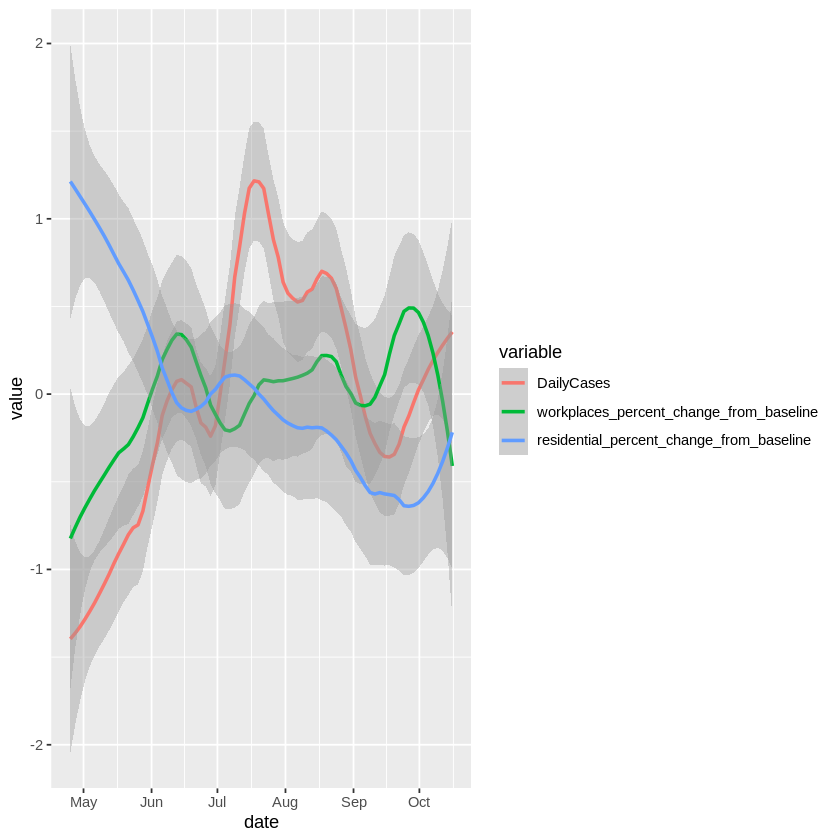

In [ ]:
selected_columns = c('DailyCases','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline')

df_melt <- melt(tb_GMCovidmycounty_scaled, measure.vars=selected_columns, value.names="Values", varialbe.name="varialbe" )
ggplot(df_melt, aes(x=date, y=value, color=variable)) + stat_smooth(span=0.3)


In [ ]:
summary(tb_GMCovidmycounty2)

   DailyCases     retail_and_recreation_percent_change_from_baseline
 Min.   :-65.00   Min.   :-42.00                                    
 1st Qu.: 30.00   1st Qu.:-14.00                                    
 Median : 58.00   Median :-11.00                                    
 Mean   : 61.15   Mean   :-11.73                                    
 3rd Qu.: 87.50   3rd Qu.: -8.00                                    
 Max.   :223.00   Max.   :  5.00                                    
                                                                    
 grocery_and_pharmacy_percent_change_from_baseline
 Min.   :-15.00000                                
 1st Qu.: -3.00000                                
 Median :  0.00000                                
 Mean   : -0.07429                                
 3rd Qu.:  3.00000                                
 Max.   : 19.00000                                
                                                  
 parks_percent_change_from_baseline
 Min

# Part 4. Does the local weather correlared with Covid19 ?  

### Get weather data from Local airport

See https://rdrr.io/cran/worldmet/man/importNOAA.html 

In [ ]:
install.packages("worldmet", lib='/content')

also installing the dependencies ‘jpeg’, ‘maps’, ‘gridExtra’, ‘latticeExtra’, ‘mapproj’, ‘hexbin’, ‘iterators’, ‘png’, ‘raster’, ‘sp’, ‘viridis’, ‘leaflet.providers’, ‘openair’, ‘doParallel’, ‘foreach’, ‘leaflet’, ‘zoo’




In [ ]:
library(worldmet, lib.loc="/content")

In [ ]:
myState
getMeta(site = 'Lovell')

[1] "Tennessee"

usaf,wban,station,ctry,st,call,latitude,longitude,elev(m),begin,end,code,dist
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<date>,<chr>,<lgl>
723240,13882,LOVELL FIELD AIRPORT,US,TN,KCHA,35.034,-85.2,204.2,1973-01-01,2020-10-19,723240-13882,NA


Find out the latitude and longitude of Pulaski, AR. 
Remember that longitude West should be negative. 

In [ ]:
info <- getMeta(lat = 35.03, lon = -85.2) # Lovell, TN
info

usaf,wban,station,ctry,st,call,latitude,longitude,elev(m),begin,end,code,longr,latr,dist
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>
723240,13882,LOVELL FIELD AIRPORT,US,TN,KCHA,35.034,-85.200,204.2,1973-01-01,2020-10-19,723240-13882,-1.487021,0.6114587,0.4447797
722154,53885,DALTON MUNICIPAL AIRPORT,US,GA,KDNN,34.722,-84.869,216.4,2006-01-01,2020-10-19,722154-53885,-1.481243,0.6060132,45.6580326
999999,63862,VALLEY HEAD 1 SSW,US,AL,NA,34.565,-85.617,310.9,2006-05-04,2020-10-19,999999-63862,-1.494299,0.6032731,64.2126670
723200,93801,RICHARD B RUSSELL AIRPORT,US,GA,KRMG,34.348,-85.161,194.8,1978-01-01,2020-10-19,723200-93801,-1.486340,0.5994857,75.9187235
A00013,63847,ISBELL FIELD AIRPORT,US,AL,K4A9,34.474,-85.721,267.3,2006-01-01,2020-10-19,A00013-63847,-1.496114,0.6016848,78.0247773
720974,00344,WINCHESTER MUNICIPAL AIRPORT,US,TN,KBGF,35.178,-86.066,298.1,2012-02-09,2020-10-19,720974-00344,-1.502135,0.6139719,80.4799468
999999,63896,SCOTTSBORO 2 NE,US,AL,NA,34.694,-86.000,193.9,2006-08-16,2020-10-19,999999-63896,-1.500983,0.6055245,81.9970693
720856,00284,SCOTTSBORO MUNICIPAL AIRPORT WORD FIELD,US,AL,K4A6,34.689,-86.006,198.1,2010-11-30,2020-10-19,720856-00284,-1.501088,0.6054373,82.7400387
721031,00348,TULLAHOMA REGIONAL AIRPORT WILLIAM NORTHERN FIELD,US,TN,KTHA,35.380,-86.246,330.1,2012-04-08,2020-10-19,721031-00348,-1.505277,0.6174975,102.6954293


Pick the first row

In [ ]:
local_code = paste( info$usaf[1], info$wban[1], sep='-')
local_code

[1] "723240-13882"

'723403-13963' is the code for LITTLE ROCK AIRPORT ADAMS FIELD, AR US

In [ ]:
weatherLocal <- importNOAA(code = local_code, year = 2020)
head(weatherLocal)

code,station,date,latitude,longitude,elev,ws,wd,air_temp,atmos_pres,⋯,cl_1,cl_2,cl_3,cl,cl_1_height,cl_2_height,cl_3_height,precip_6,precip,pwc
<fct>,<fct>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 00:00:00,35.03362,-85.20044,204.2,2.85,214.5603,8.05,1016.2,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 01:00:00,35.03362,-85.20044,204.2,2.10,230.0000,7.80,1016.7,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 02:00:00,35.03362,-85.20044,204.2,2.10,220.0000,6.70,1016.8,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 03:00:00,35.03362,-85.20044,204.2,2.10,250.0000,6.10,1017.6,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 04:00:00,35.03362,-85.20044,204.2,2.60,260.0000,6.10,1017.8,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 05:00:00,35.03362,-85.20044,204.2,1.50,280.0000,4.40,1017.8,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA


In [ ]:
names(weatherLocal)

[1] "code"        "station"     "date"        "latitude"    "longitude"  
 [6] "elev"        "ws"          "wd"          "air_temp"    "atmos_pres" 
[11] "visibility"  "dew_point"   "RH"          "ceil_hgt"    "cl_1"       
[16] "cl_2"        "cl_3"        "cl"          "cl_1_height" "cl_2_height"
[21] "cl_3_height" "precip_6"    "precip"      "pwc"

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 10 rows containing non-finite values (stat_smooth).”


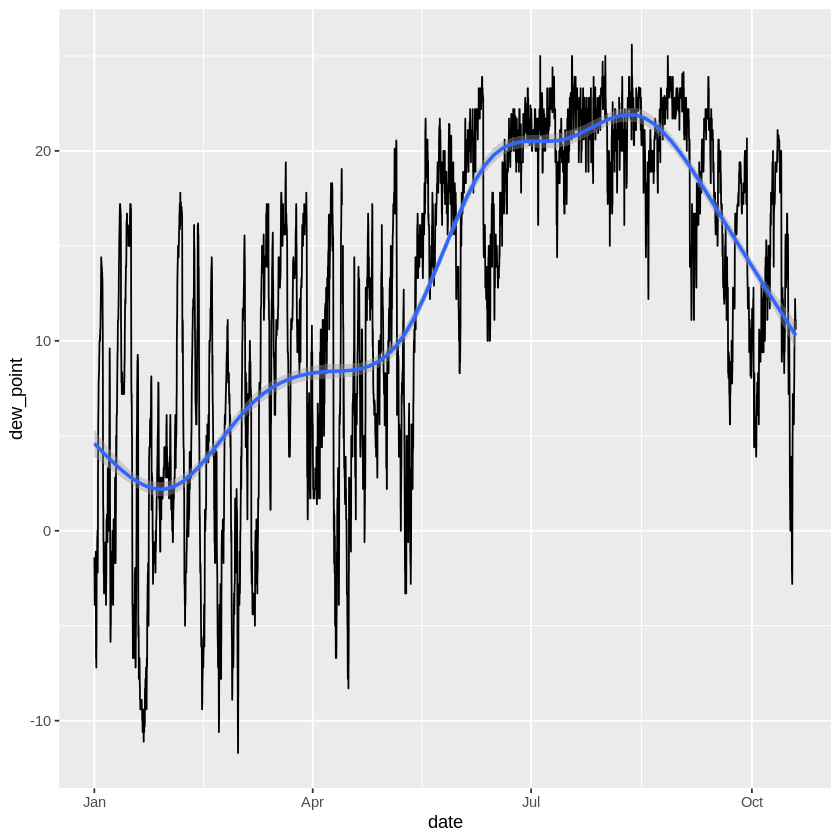

In [ ]:
library(ggplot2)
ggplot(weatherLocal, aes(x=date,y=dew_point)) + geom_line() + stat_smooth(span=0.3)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 9 rows containing non-finite values (stat_smooth).”


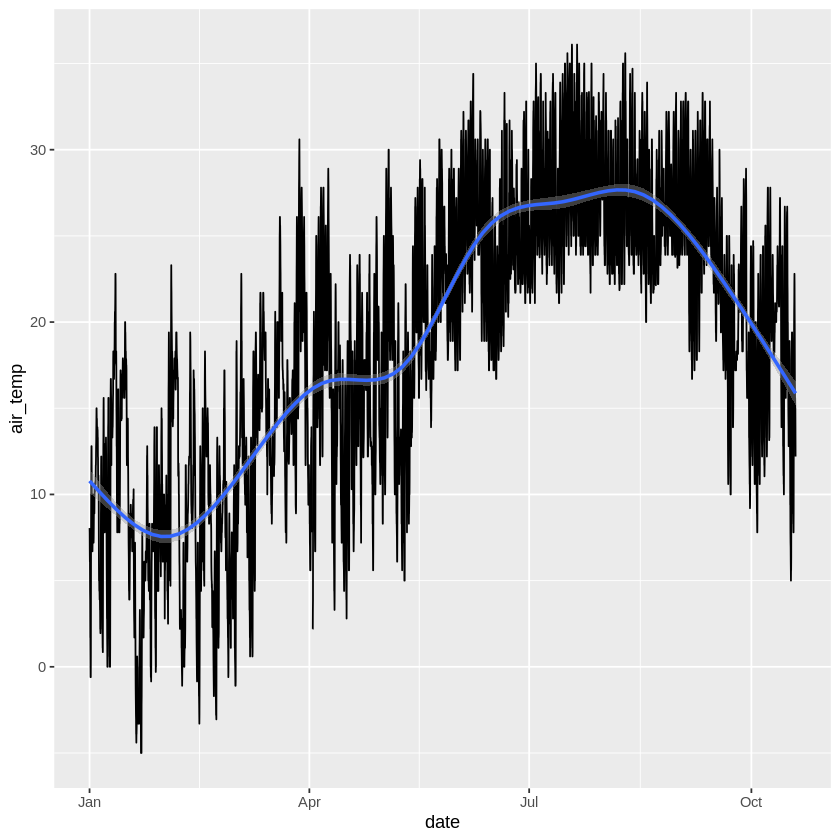

In [ ]:
ggplot(weatherLocal, aes(x=date,y=air_temp)) + geom_line() + stat_smooth(span=0.3)

In [ ]:
weatherLocal2 <- weatherLocal %>% dplyr::select( c('date', 'air_temp', 'dew_point', 'RH'))

### Reformate dates

In [ ]:
library(lubridate)

In [ ]:
clean_dates = gsub( " UTC ", "", weatherLocal2$date)

weatherLocal2$YMD = as.Date(clean_dates)
head(weatherLocal2$YMD)

[1] "2020-01-01" "2020-01-01" "2020-01-01" "2020-01-01" "2020-01-01"
[6] "2020-01-01"

In [ ]:
weatherLocal3 <- weatherLocal2 %>% group_by( YMD ) %>% summarise_if( is.numeric, mean, na.rm=TRUE)

head( weatherLocal3 )

YMD,air_temp,dew_point,RH
<date>,<dbl>,<dbl>,<dbl>
2020-01-01,6.135417,-3.406250,55.57241
2020-01-02,8.152083,2.459028,70.09230
2020-01-03,11.631052,11.136458,96.83876
2020-01-04,11.440972,7.850000,80.65194
2020-01-05,5.883333,-2.272917,57.84938
2020-01-06,7.137500,0.787500,67.79407


### Merge local weather data with Covid19 data

In [ ]:
tail( tb_daily_sub )

,"Hamilton, Tennessee, US","Davidson, Tennessee, US",YMD
,<dbl>,<dbl>,<date>
10/15/20,55,178,2020-10-15
10/16/20,49,38,2020-10-16
10/17/20,84,252,2020-10-17
10/18/20,65,240,2020-10-18
10/19/20,114,376,2020-10-19
10/20/20,100,113,2020-10-20


In [ ]:
tb_local=   merge(x=tb_daily_sub, y=weatherLocal3, by= 'YMD', all.y=FALSE)
tail(tb_local)

,YMD,"Hamilton, Tennessee, US","Davidson, Tennessee, US",air_temp,dew_point,RH
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
173,2020-10-14,64,88,17.10417,10.712500,69.60128
174,2020-10-15,55,178,20.21875,14.479167,71.44762
175,2020-10-16,49,38,16.50694,8.314583,60.71605
176,2020-10-17,84,252,11.91875,1.620833,55.48256
177,2020-10-18,65,240,14.12292,7.752083,68.23228
178,2020-10-19,114,376,15.01250,11.325000,78.94757


In [ ]:
#startdate= min(tb_local$date)
startdate = mdy('4/1/2020')
enddate  = today(tzone='CDT')


tb_local2 <- tb_local %>% 
  dplyr::select( c(1,2,4:6)) %>%
  dplyr::filter( between(YMD, startdate, enddate))
  
names(tb_local2) = c("date", "dailyCases", "temp", "dew_point", "RH")
head( tb_local2 )


Warning message in with_tz(Sys.time(), tzone):
“Unrecognized time zone 'CDT'”


,date,dailyCases,temp,dew_point,RH
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-04-25,7,16.49063,13.083333,82.28611
2,2020-04-26,1,13.77083,7.338194,65.57922
3,2020-04-27,5,13.37083,4.864583,61.64522
4,2020-04-28,3,17.16042,7.947917,60.43528
5,2020-04-29,3,18.70466,11.500099,64.54732
6,2020-04-30,4,13.92746,9.502758,77.61408


### plot cases and weather

,dailyCases,temp,dew_point,RH,date
,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1,-1.275185,-1.511193,-0.7906881,1.2893868,2020-04-25
2,-1.415326,-2.105433,-1.8743607,-0.6365511,2020-04-26
3,-1.321899,-2.192828,-2.3409438,-1.0900554,2020-04-27
4,-1.368612,-1.364852,-1.7593523,-1.2295345,2020-04-28
5,-1.368612,-1.027454,-1.0893245,-0.7555064,2020-04-29
6,-1.345255,-2.071212,-1.4660715,0.7508040,2020-04-30


,dew_point,RH,date,Types,Measurements
,<dbl>,<dbl>,<date>,<fct>,<dbl>
1,-0.7906881,1.2893868,2020-04-25,dailyCases,-1.275185
2,-1.8743607,-0.6365511,2020-04-26,dailyCases,-1.415326
3,-2.3409438,-1.0900554,2020-04-27,dailyCases,-1.321899
4,-1.7593523,-1.2295345,2020-04-28,dailyCases,-1.368612
5,-1.0893245,-0.7555064,2020-04-29,dailyCases,-1.368612
6,-1.4660715,0.7508040,2020-04-30,dailyCases,-1.345255


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



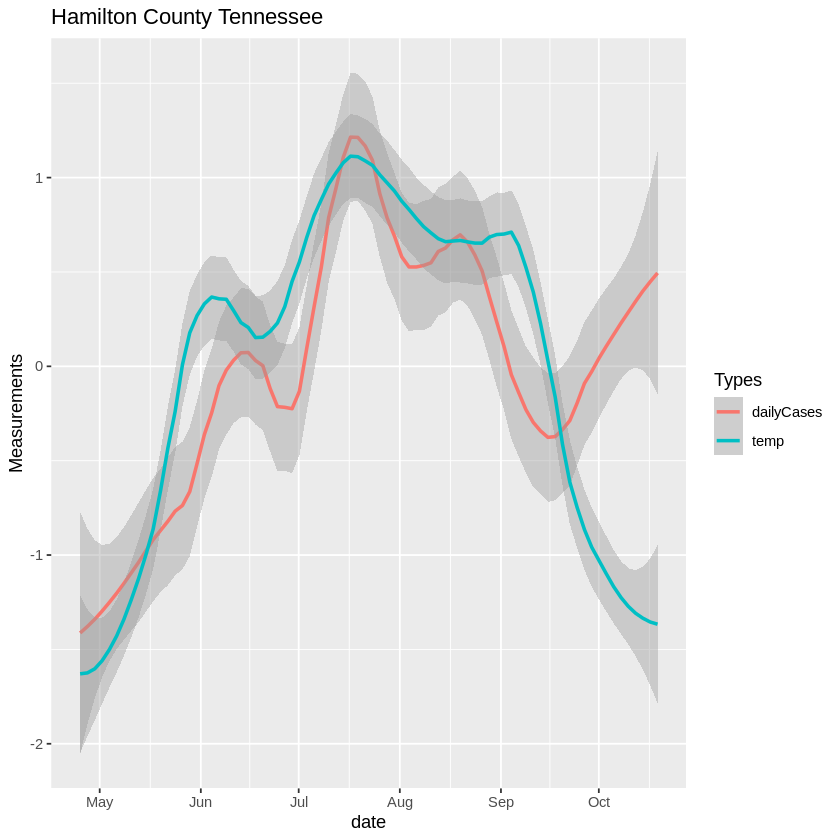

In [ ]:
tb_local_scaled = data.frame( as.matrix(scale(tb_local2[,2:5])) )
tb_local_scaled$date = tb_local2$date
head(tb_local_scaled)

#df_tmp <- melt(tb_HCTN2_scaled, measure.vars = c("dailyCases", "temp", "dew_point", "RH"), value.name = 'Measurements', variable.name = 'Types')
df_tmp <- melt(tb_local_scaled, measure.vars = c("dailyCases", "temp"), value.name = 'Measurements', variable.name = 'Types')
head(df_tmp)
plot <- ggplot(df_tmp, aes(x=date, y=Measurements, color=Types)) + stat_smooth(span=0.3)
plot + ggtitle( paste( myCounty, myState))

### (optional) Cross correlation

In [ ]:
ccf( tb_HCTN2$dailyCases, tb_HCTN2$dew_point, lag.max=30, type="correlation", na.action = na.pass)

ERROR: ignored

In [ ]:
ccf( tb_HCTN2$dew_point, tb_HCTN2$dailyCases,  lag.max=30, type="correlation", na.action = na.pass)

In [ ]:
ccf( tb_HCTN2$dailyCases, tb_HCTN2$dailyCases,  lag.max=30, type="correlation", na.action = na.pass)

In [ ]:
ccf( tb_HCTN2[,2], tb_HCTN2$RH, lag.max=30, type="correlation")

In [ ]:
ccf( tb_HCTN2$RH, tb_HCTN2$dew_point, lag.max=25, type="correlation") #RH and dew_point is highly correlated

In [ ]:
acf(tb_HCTN$temp,  type="correlation")

In [ ]:
obj = ccf( tb_HCTN2[,2], tb_HCTN2$temp, lag.max=25, type="correlation")
str(obj)

In [ ]:
?merge


# Part 5, Explore the USA state-level data

Group by states

## Convert the county-level time series data to state-level data 

In [ ]:
tb0 = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))
#str(tb.jhu) #this is a tibble
head(tb0)

merge all row of the same state by 'group_by'
follow by 'summarize_if'

In [ ]:
tb1 = tb0[, c(7, 50:length(tb[1,])) ]

tb2 <- tb1 %>%
  group_by(Province_State) %>%
  summarize_if(is.numeric, sum,na.rm=TRUE)

head(tb2)

In [ ]:
length( tb2$Province_State )
print( paste("There are ", length( tb2$Province_State ),  " states"))

## Covert cumulative counts into daily cases

### First, do a few tests on simple data sets to make sure that we know what we are doing.

In [ ]:
? apply

In [ ]:
? diff

In [ ]:
x = data.frame(1:10)
x

In [ ]:
apply(x, 2, diff)

In [ ]:
y = data.frame(10:1)
y

In [ ]:
apply(y, 2, diff)

### Now, process a small data set to verify the results

In [ ]:
test = tb2[1:5, 10:20]
test

In [ ]:
apply( test, 1, diff)

### Now, we are comfortable to apply our method to the entire data set. 

In [ ]:
tb3 = apply(tb2[, 2:length(tb2[1,])], 1, diff)
tb3= data.frame(tb3)
head(tb3)

## Add states names as columns names

Current names are not informative

In [ ]:
names(tb3)

Information of States will be more relevant.

In [ ]:
tb2$Province_State

Assign the columns names with the State-names

In [ ]:
names(tb3) = tb2$Province_State
head(tb3)

## Convert date-text to Date type

In [ ]:
row.names(tb3)

In [ ]:
tb3$dates = mdy(row.names(tb3))
head(tb3)

## Plot

In [ ]:
tb3[,2]

### Scatter plot with trend

In [ ]:
ggplot(tb3, aes(x=dates, y=Colorado)) + geom_point() + geom_smooth()


### Plot for a time-window

In [ ]:
#end = mdy("5/1/20")
end = today(tzone='EST') - 1
end

In [ ]:
tb_sub <- 
 tb3 %>% filter( dates >= end- ddays(90), dates <  end) #This is 90 day window

ggplot(tb_sub, aes(x=dates, y=Colorado)) + geom_point() + geom_smooth()


### Let's look a specific State. 
How about Tennessee? 

In [ ]:
names(tb3)

In [ ]:
days_window = 90 #90-day window
endday = today(tzone = 'EST')

tb_TN <- tb3 %>% 
  dplyr::select( 'Tennessee', 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday)) 

In [ ]:
head(tb_TN)

In [ ]:
ggplot(tb_TN, aes(x=dates, y=tb_TN[,1])) + geom_point() + geom_smooth()

### Multiple plots to compare two states

In [ ]:
days_window = 90 #90-day window
endday = today(tzone='EST') -1

mystates = c('Tennessee', 'Wisconsin', 'South Dakota')

tb_2States <- tb3 %>% 
  dplyr::select( c(mystates, 'dates') ) %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

tail(tb_2States)

In [ ]:
library(reshape2)

In [ ]:
df_tmp <- melt(tb_2States, measure.vars = mystates)
head(df_tmp)

In [ ]:
names(df_tmp) = c("dates", "State", "DailyCases")
head(df_tmp)

In [ ]:
ggplot(df_tmp, aes(x=dates, y=DailyCases, color=State)) + geom_point() + stat_smooth(spanc=0.3)

### How about more than two states? 

In [ ]:
mystates = c('Tennessee','Georgia', 'Alabama', 'Florida')

days_window = 90 #90-day window
endday = today(tzone = 'EST') -1

tb_sub <- tb3 %>% 
  dplyr::select( all_of(mystates), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)


In [ ]:
df_tmp <- melt(tb_sub, measure.vars = mystates, value.name = 'DailyCases', variable.name = 'State')
head(df_tmp)

In [ ]:
ggplot(df_tmp, aes(x=dates, y=log10(DailyCases), color=State)) + geom_point() + geom_smooth() 

# Part 6. Transmission analysis

### Study the Germany 1918 example

In [ ]:
install.packages('R0', lib = '/content')
#library('R0')
library("R0", lib.loc="/content")

In [ ]:
help(package='R0')

In [ ]:
#?est.R0.AR
#$example(est.R0.AR)

In [ ]:
data(Germany.1918)
head(Germany.1918)

In [ ]:
str(Germany.1918)

In [ ]:
plot(Germany.1918)

In [ ]:
?est.R0.TD

In [ ]:
example(est.R0.TD)

In [ ]:
mGT <- generation.time("gamma", c(3,1.5))
SB <- est.R0.SB(Germany.1918, mGT, begin=1, end=100)
str(SB)

In [ ]:
plot(SB)

### Estimate Rt to Covid19 for Tennessee

The mean generation time of Covid19 is estimated to 4-5 days. 

In [ ]:
mystates = c('Tennessee','Georgia', 'Alabama', 'Florida')

days_window = 180 #90-day window
endday = today(tzone = 'EST') -1

tb_sub <- tb3 %>% 
  dplyr::select( all_of(mystates), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)

In [ ]:
length(tb_sub[,1])

In [ ]:
mGT<-generation.time("gamma", c(5, 1.5)) #model of serial generation time for SARS-CoV-2, (4, 7)
mGT

In [ ]:
TD <- est.R0.TD(tb_sub$Tennessee, mGT, begin=1, end=181, nsim=100)

In [ ]:
#str(TD)
length(tb_sub[,1])

In [ ]:
tb_sub$Rt = TD$R

In [ ]:
ggplot( tb_sub, aes(x=dates, y=Rt) ) +
   geom_point() + 
   stat_smooth( span=0.4)

## How about Hamilton County, TN? 

In [ ]:
install.packages('R0')
library('R0')

In [ ]:
library(tidyverse)
library(lubridate)
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))

tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1))

names(tb1) = tb$Combined_Key

current_dates = names(tb)[12:length(tb[1,])]
tb1$dates = mdy(current_dates)

### Select Hamilton, Tennessee, US

In [ ]:
names(tb1) [grep(  "Tennessee", names(tb1))]

In [ ]:
window = 180

tb_sub <-  tb1 %>% 
  dplyr::select ( c('Hamilton, Tennessee, US', 'Davidson, Tennessee, US', 'dates')) %>%
  dplyr::filter( between(dates, today(tzone='EST') - window,  today(tzone ='EST')))

str(tb_sub)

In [ ]:
ggplot(tb_sub, aes(x=dates, y=tb_sub[,1])) + geom_point()

In [ ]:
tail(tb_sub)

### Estiamte daily cases

March 31 Tuesday has 15 cases, but Sunday and Monday has zero cases. 

Hong will try to spead the spike daily counts into previous days with zeros. 

In [ ]:
tb_daily_sub = data.frame( apply(tb_sub[,1:2], 2, diff) )
head(tb_daily_sub, n=15)

In [ ]:
wday(mdy('3/31/20'))

In [ ]:
tb_daily_sub$YMD = mdy(row.names(tb_daily_sub))
head(tb_daily_sub)

In [ ]:
# make sure all daily cases are positive integer or zeros
tb_daily_sub$Hamilton..Tennessee..US[tb_daily_sub$Hamilton..Tennessee..US<0 ] =0
head(tb_daily_sub)
summary(  tb_daily_sub)

In [ ]:
# correct some errors in Hamilton TN 
#tb_daily_sub[c('3/20/20', '3/21/20'), 1] = c(1,1)
#tb_daily_sub[c('3/24/20', '3/25/20'), 1] = c(7, 7)
#tb_daily_sub[c('3/29/20', '3/30/20', '3/30/20'), 1] = c(5, 5, 5)

In [ ]:
tail(tb_daily_sub)

In [ ]:


myplot <- ggplot( tb_daily_sub, aes(x=YMD, y=Hamilton..Tennessee..US)) + geom_point() + stat_smooth(span=0.3) 
myplot + ggtitle("Daily Cases in Hamilton County, TN") +  theme(plot.title = element_text(hjust = 0.5))

### Estimate Rt for Hamilton, TN

In [ ]:
mGT<-generation.time("gamma", c(5, 1.5)) #based on literature reading serial generation time (incubtation time) (4-7), with long distbution
x = tb_daily_sub[,1]
x[x<0]= 0
length(x)
summary(x)
plot(x)

In [ ]:
start = 1
offset = 1
stop = length(x)-offset # Rt estimation need a few day, try 5 days

TD<- est.R0.TD(x, mGT, begin=start, end=stop, nsim=100) 

In [ ]:
#str(TD)

In [ ]:
tb_daily_sub$RtHamilton =  c( TD$R, rep(NA, offset))

In [ ]:
head(tb_daily_sub)

In [ ]:
tail(tb_daily_sub)

In [ ]:
number_of_rows = length(tb_daily_sub[,1 ])
tb_daily_sub$RtHamilton[ 1 : 5] = NA #remove first 5 rows 
tb_daily_sub$RtHamilton[ (number_of_rows-offset-2) :number_of_rows] = NA #remove last few rows

In [ ]:
# add dates
list_of_dates = row.names( tb_daily_sub)
tb_daily_sub$dates = mdy( list_of_dates )

In [ ]:
ggplot(tb_daily_sub, aes(x=dates, y=RtHamilton) ) +
  geom_point() +
  stat_smooth(span=.35) +
  ggtitle("Effective Reproductive Number of Covid19, Hamilton, TN")

For policy and new related to Covid19 at Hamitlon, TN, see http://health.hamiltontn.org/AllServices/Coronavirus(COVID-19)/PressReleases.aspx  <br> 

March 13, first case. <br> 

April 27, governor order restaraunt reopenning. <br> 

July 4th, holiday weekend. If it happended to Hamilton, it might happend to other counties with similar densities? The TN state did show a spike after 4 of July <br> 


In [ ]:
ggplot(tb_daily_sub, aes(x=dates, y= tb_daily_sub[,1] )) +
  geom_point() +
  stat_smooth(span=0.4) +
  ggtitle("Daily confirmed cases at Hamilton, TN")

### Can we remove some noises in Rt? (in progress)

In [ ]:
tb_daily_sub$index = 1: length( tb_daily_sub[,1]) 

loessSpan04 = loess( RtHamilton ~ index, data=tb_daily_sub, span=0.4 )

In [ ]:
plot( predict( loessSpan04))

In [ ]:
#str(loessSpan04)

In [ ]:
plot(loessSpan04$fitted)

### Nashville counties (todo)

### Memphis counties


### Knoxville

# Part 7. Apple Mobility

## Download and upload 
Download apple mobility csv from https://covid19.apple.com/mobility, then upload to CoLab

In [ ]:
tbAM = read_csv("/content/applemobilitytrends-2020-10-02.csv")
head(tbAM)

In [ ]:
unique( tbAM$country)

In [ ]:
names(tbAM)[5] = "subregion"

## Pick Hamilton, TN

In [ ]:
tbAMTN <-  tbAM %>% dplyr::filter( country == "United States", subregion=="Tennessee")
head(tbAMTN)

In [ ]:
unique(tbAMTN$region)

In [ ]:
tbAMTN$region[ grep("Hamilton", tbAMTN$region) ]

In [ ]:
tbAMHCTN <-  tbAM %>% dplyr::filter( country == "United States", subregion=="Tennessee", region=="Hamilton County")
head(tbAMHCTN)

So, Apple mobility report is in a similar format like the JHU Covid19 data

In [ ]:
tbAMHCTN2 = data.frame( t(tbAMHCTN[, 7: length(names(tbAMHCTN))]))
names( tbAMHCTN2 ) = c("driving", "walking")
tbAMHCTN2$date = ymd( row.names(tbAMHCTN2))
head(tbAMHCTN2)

## Merge with previous combined dataframe 
tb_GMCovidWeatherHCTN2

In [ ]:
head(tb_GMCovidWeatherHCTN2)

In [ ]:
tbAMHCTN2b <- 
  tbAMHCTN2 %>% filter( between(date, min(tb_GMCovidWeatherHCTN2$date), max(tb_GMCovidWeatherHCTN2$date)))

In [ ]:
tb_GMAMCovidWeatherHCTN <- 
 cbind( tb_GMCovidWeatherHCTN2[, c("date", "dailyCases", "temp", "dew_point", "RH", "workplaceMobility", "residentialMobility")], tbAMHCTN2b[, 1:2] )

str( tb_GMAMCovidWeatherHCTN )

In [ ]:
pairs( tb_GMAMCovidWeatherHCTN )

In [ ]:
ggplot(tb_GMAMCovidWeatherHCTN, aes(x=date, y=walking) ) + geom_point() + stat_smooth(span=0.3)

In [ ]:
ggplot(tb_GMAMCovidWeatherHCTN, aes(x=date, y=driving) ) + geom_point() + stat_smooth(span=0.2)

## Normalize and overlay

In [ ]:
head( tb_GMAMCovidWeatherHCTN )

tb_scaled <-  data.frame( scale(tb_GMAMCovidWeatherHCTN[, 2:9])) 
tb_scaled$date = tb_GMAMCovidWeatherHCTN$date
head( tb_scaled  )

In [ ]:
#selected_columns = c("dailyCases", "temp", "dew_point", "RH",   "workplaceMobility", "residentialMobility", "driving", "walking" )

selected_columns = c( "dailyCases", "workplaceMobility", "residentialMobility", "driving", "walking" )

tb_tmp <- tb_scaled %>% dplyr::filter( between(date, mdy('6/1/20'), mdy('9/27/20')))

df_melt <- melt(tb_tmp, measure.vars=selected_columns, value.names="Values", varialbe.name="varialbe" )
ggplot(df_melt, aes(x=date, y=value, color=variable)) + stat_smooth(span=0.3)

## ccf

In [ ]:
ccf( tb_GMAMCovidWeatherHCTN$temp, tb_GMAMCovidWeatherHCTN$driving, lag.max=15, type="correlation", na.action = na.pass)

In [ ]:
summary(lm(driving ~ temp, data=tb_tmp ))

In [ ]:
ccf( tb_GMAMCovidWeatherHCTN$dailyCases, tb_GMAMCovidWeatherHCTN$driving, lag.max=15, type="correlation", na.action = na.pass)

In [ ]:
ccf( tb_GMAMCovidWeatherHCTN$dailyCases, tb_GMAMCovidWeatherHCTN$workplaceMobility, lag.max=20, type="correlation", na.action = na.pass)

In [ ]:
ccf( tb_GMAMCovidWeatherHCTN$dailyCases, tb_GMAMCovidWeatherHCTN$residentialMobility, lag.max=20, type="correlation", na.action = na.pass)

In [ ]:
ccf( tb_GMAMCovidWeatherHCTN$dailyCases, tb_GMAMCovidWeatherHCTN$RH, lag.max=15, type="correlation", na.action = na.pass)

In [ ]:
ccf( tb_GMAMCovidWeatherHCTN$dailyCases, tb_GMAMCovidWeatherHCTN$dew_point, lag.max=15, type="correlation", na.action = na.pass)

In [ ]:
summary(lm(dailyCases ~ walking + temp, data=tb_tmp ))

In [ ]:
ccf

# Part X Global Daily cases 

In [ ]:
library(tidyverse)
library(lubridate)
# load JHU covid19 data set with tidyverse read_csv
gtb = read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

head(gtb)

In [ ]:
head(gtb[, 5:length(gtb[1,])])

In [ ]:
g_cumulative = data.frame( apply( gtb[,5:length(gtb[1,])], 2, sum ))
str(g_cumulative)
head(g_cumulative)

In [ ]:
g_cummulative2= g_cumulative
g_cummulative2$Dates =  mdy(row.names(g_cummulative2))
names( g_cummulative2 ) = c("Daily_cases", "Dates")
head( g_cummulative2)

In [ ]:
ggplot( g_cummulative2, aes(x=Dates, y=Daily_cases)) + geom_point() + stat_smooth(span=0.3) + ggtitle("Global Cumulative Reported Covid19 Cases") + theme(plot.title=element_text(hjust=0.5))

In [ ]:
g_daily = data.frame(apply(g_cumulative, 2, diff))
g_daily$date = mdy(row.names(g_daily))
names(g_daily) = c("Daily_cases", "Dates")
head(g_daily)

In [ ]:
ggplot( g_daily, aes(x=Dates, y=Daily_cases)) + geom_point() + stat_smooth(span=0.3) + ggtitle("Global Daily Reported Covid19 Cases") + theme(plot.title=element_text(hjust=0.5))

In [ ]:
plot(x)

# Part Y. Canada Covid19 data analysis

### pre-process

In [ ]:
library(tidyverse)
library(lubridate)
# load JHU covid19 data set with tidyverse read_csv
gtb = read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

head(gtb)

In [ ]:
names(gtb)[1:2] = c("Province", "Country")
head(gtb)

In [ ]:
ctb <- gtb %>% 
 filter( gtb$Country == 'Canada')

head(ctb)

In [ ]:
ctb1 <- ctb %>% dplyr::select(5:length(ctb[1,])) %>% as.matrix()
ctb1 = as.data.frame(t(ctb1))
head(ctb1)

In [ ]:
names(ctb1) = ctb$Province
ctb1 = ctb1[ -c(1:50), ] #remove first 50 rows with very low numbers
head(ctb1)

## Convert cumulative values into daily new cases

In [ ]:
ctb2 = data.frame(apply(ctb1, 2, diff))
head(ctb2)

In [ ]:
current_dates = row.names(ctb2)
ctb2$dates = mdy(current_dates)
head(ctb2)

In [ ]:
#myprovinces = c('Alberta','British.Columbia', 'Ontario')
myprovinces = c('Alberta','Ontario')

days_window = 150 # time window
endday = today(tzone = 'EST') -1

tb_sub <- ctb2 %>% 
  dplyr::select( all_of(myprovinces), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

tail(tb_sub)

In [ ]:
install.packages('reshape2')
library(reshape2)
df_tmp <- reshape2::melt(tb_sub, measure.vars = myprovinces, value.name = 'DailyCases', variable.name = 'State')
head(df_tmp)

In [ ]:
ggplot(df_tmp, aes(x=dates, y=DailyCases,color=State)) + geom_point() + stat_smooth(span=0.3)

## Estimate Rt

In [ ]:
install.packages('R0')
install.packages('reshape2')

library('R0')

In [ ]:
str(tb_sub)

In [ ]:
mGT<-generation.time("gamma", c(5, 1.5))
tmp = tb_sub[,2] #Ontario
tmp[tmp<0] = 0
TD <- est.R0.TD(tmp, mGT, begin=1, end=length(tmp)-1+1, nsim=100)
tb_sub$RtOntario = TD$R


In [ ]:
tmp = tb_sub[,1] #Alberta
tmp[tmp<0] = 0
TD <- est.R0.TD(tmp, mGT, begin=1, end=length(tmp)-1+1, nsim=100)
tb_sub$RtAlberta = TD$R


In [ ]:
tail(tb_sub)

In [ ]:
df_tmp <- reshape2::melt(tb_sub[, 3:5], measure.vars = c("RtOntario", "RtAlberta"), value.name = 'Rt', variable.name = 'Rt_by_State')
df_tmp$Rt[ df_tmp$Rt==0] = NA
tail(df_tmp)


In [ ]:
ggplot(df_tmp, aes(x=dates, y=log10(Rt), color=Rt_by_State) ) +
  geom_point() +
  stat_smooth(span=0.3)

# Part Y todo Sweeden Covid19 data analysis

# Sandbox

In [ ]:
x <- runif(12,1,1.5)
y <- runif(12,1,1.5)
z <- runif(12,1,1.5)
m <- letters[1:12]
df <- data.frame(x,y,z,m)


In [ ]:
#library(tidyverse)
#install.packages('reshape2')
library(reshape2)
library(ggplot2)
#when you melt essentially you create only one column with the value
#and one column with the variable i.e. your x,y,z 
df <- melt(df, id.vars='m')
head(df)

In [ ]:
ggplot(df, aes(x=variable, y=value, fill=m)) + geom_bar(stat = 'identity')

In [ ]:
#ggplot it. x axis will be m, y will be the value and fill will be
#essentially your x,y,z

ggplot(df, aes(x=m, y=value, fill=variable)) + geom_bar(stat='identity')

# git clone? 

In [ ]:
system("git clone https://github.com/hongqin/Use-R-in-CoLab.git")
system("ls")

In [ ]:
system( "ls /content")